In [3]:
library(tidyverse)
library(repr)
#library(tidymodels)
options(repr.matrix.max.rows = 6)
#library(ggplot2)
library(cowplot)

In [4]:
data <- read_csv("abc/newvaccine.csv")
data

Rows: 74676 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): prename, prfname, sex, age, numtotal_atleast1dose, numtotal_parti...
dbl   (4): pruid, numtotal_additional, numtotal_2nd_additional, numtotal_rec...
date  (1): week_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prename,prfname,week_end,sex,age,numtotal_atleast1dose,numtotal_partially,numtotal_fully,numtotal_additional,numtotal_2nd_additional,numtotal_recent_fullyoradditional,proptotal_atleast1dose,proptotal_partially,proptotal_fully,proptotal_additional,proptotal_2nd_additional,proptotal_recent_fullyoradditional
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Canada,Canada,2020-12-19,All sexes,0–15,2,2,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,16–69,11766,11766,0,NA,NA,NA,0.1,0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,70–74,174,174,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Nunavut,Nunavut,2022-11-06,Not reported,All ages,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-11-06,Not reported,Not reported,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-11-06,Not reported,Unknown,0,0,0.0,0,0,NA,na,na,na,na,na,na


In [5]:
data_allsex_canada<- data|>
filter(prename=="Canada")|>
filter(sex=="All sexes")|>
mutate(numtotal_atleast1dose=as.numeric(numtotal_atleast1dose))|>
mutate(numtotal_fully=as.numeric(numtotal_fully))|>
mutate(numtotal_additional=as.numeric(numtotal_additional))|>
mutate(numtotal_partially=as.numeric(numtotal_partially))

data2<-data_allsex_canada |> 
    select(week_end:numtotal_recent_fullyoradditional, -sex)

In [6]:
newdata<- data2|>
    mutate(days=as.numeric(week_end)-18615)|>
    select(-week_end)

In [7]:
newnewdata <- newdata|>
mutate(days=days)|>
mutate(numtotal_atleast1dose=as.vector(numtotal_atleast1dose))|>
mutate(dose1=as.vector(numtotal_partially))|>
mutate(dose2=as.vector(numtotal_fully))|>
mutate(dose3=as.vector(numtotal_additional))|>
mutate(dose4=as.vector(numtotal_2nd_additional))|>
mutate(dose5=as.vector(numtotal_recent_fullyoradditional))|>
select(-numtotal_recent_fullyoradditional,-numtotal_2nd_additional,-numtotal_fully,-numtotal_partially,-numtotal_additional)
newnewdata

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0–15,2,0,2,0,NA,NA,NA
16–69,11766,0,11766,0,NA,NA,NA
70–74,174,0,174,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32355994,687,2676211,24302196,19459403,7274231,7741196
Not reported,410,687,357,53,0,0,53
Unknown,18043,687,2569,15474,10960,4831,8673


In [8]:
na_row_total<- nrow(newnewdata[is.na(newnewdata$numtotal_atleast1dose),])
na_row_total
na_row_1<- nrow(newnewdata[is.na(newnewdata$dose1),])
na_row_1
na_row_2<- nrow(newnewdata[is.na(newnewdata$dose2),])
na_row_2
na_row_3<- nrow(newnewdata[is.na(newnewdata$dose3),])
na_row_3
na_row_4<- nrow(newnewdata[is.na(newnewdata$dose4),])
na_row_4
na_row_5<- nrow(newnewdata[is.na(newnewdata$dose5),])
na_row_5

[1] 0

[1] 0

[1] 0

[1] 564

[1] 629

[1] 866

In [9]:
newdata18<-newnewdata|>filter(age=="18–29")
newdata18

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18–29,489425,119,404849,84576,NA,NA,NA
18–29,599663,126,509309,90354,NA,NA,NA
18–29,723344,133,623251,100093,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
18–29,5213681,631,652740,4072118,2244971,119439,336267
18–29,5213772,659,652175,4072599,2251677,180621,348665
18–29,5210370,687,651777,4069789,2261159,298738,436666


In [10]:
#a<- ggplot(newnewdata, aes(x=days,y=dose3))+
#geom_point(aes(color=age))+
#stat_smooth(method='lm',formula='dose3~days',se=FALSE)

#dose3~1750000*days^0.27
#newnewdata<-newnewdata|>filter(age=='All ages')
fit<-lm(dose3~log(days),data=newnewdata)
beta<-coef(fit)
predict_y_nonlinearly<-function(beta, x) {
beta[1]+beta[2]*exp(-beta[3]*x)}

a_nonlinearmodel <- function(beta, x, y){
    yhat<-predict_y_nonlinearly(beta, x)
    sum((y-yhat)^2)}

beta<- optim(rnorm(3), a_nonlinearmodel, method='L-BFGS-B', x=newnewdata$days, y=newnewdata$dose3,
     lower=c(-Inf,-Inf,1e-5),
     upper=c(Inf,Inf,Inf) )$par

newnewdata$yhat<-predict_y_nonlinearly(beta,newnewdata$days)

ggplot(data=newnewdata)+
geom_point(aes(days,dose3))+
geom_line(aes(days, yhat))

ERROR: Error in optim(rnorm(3), a_nonlinearmodel, method = "L-BFGS-B", x = newnewdata$days, : L-BFGS-B needs finite values of 'fn'


Warning message:
“Removed 564 rows containing missing values (geom_point).”


Nonlinear regression model
  model: dose3 ~ c * days^z
   data: newnewdata
       c        z 
2060.755    1.142 
 residual sum-of-squares: 5.961e+15

Number of iterations to convergence: 45 
Achieved convergence tolerance: 6.711e-06

Warning message:
“Removed 564 rows containing missing values (geom_point).”


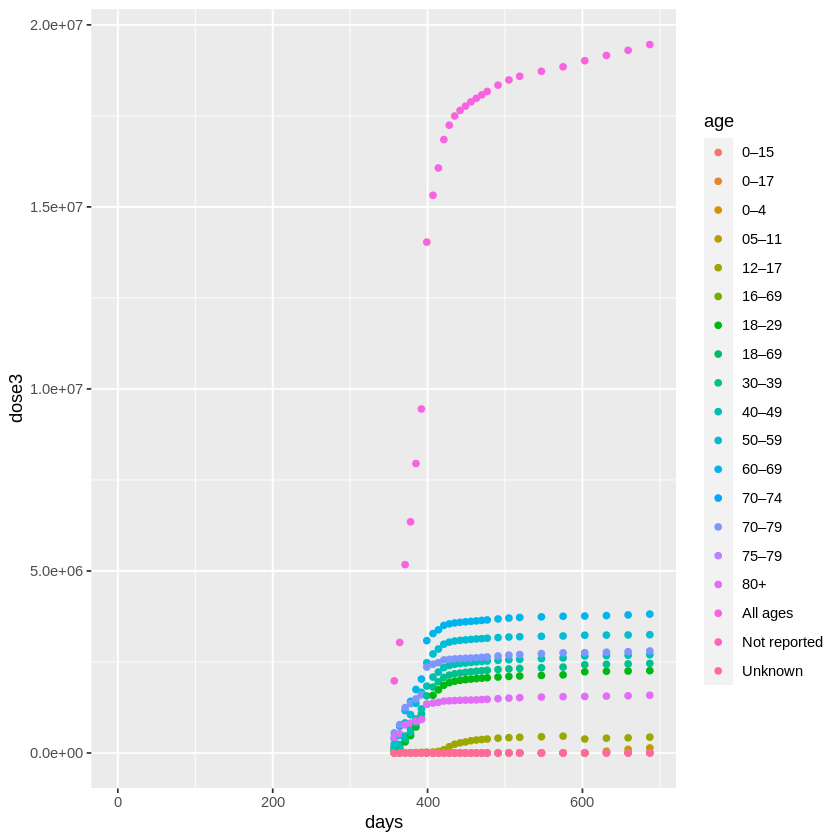

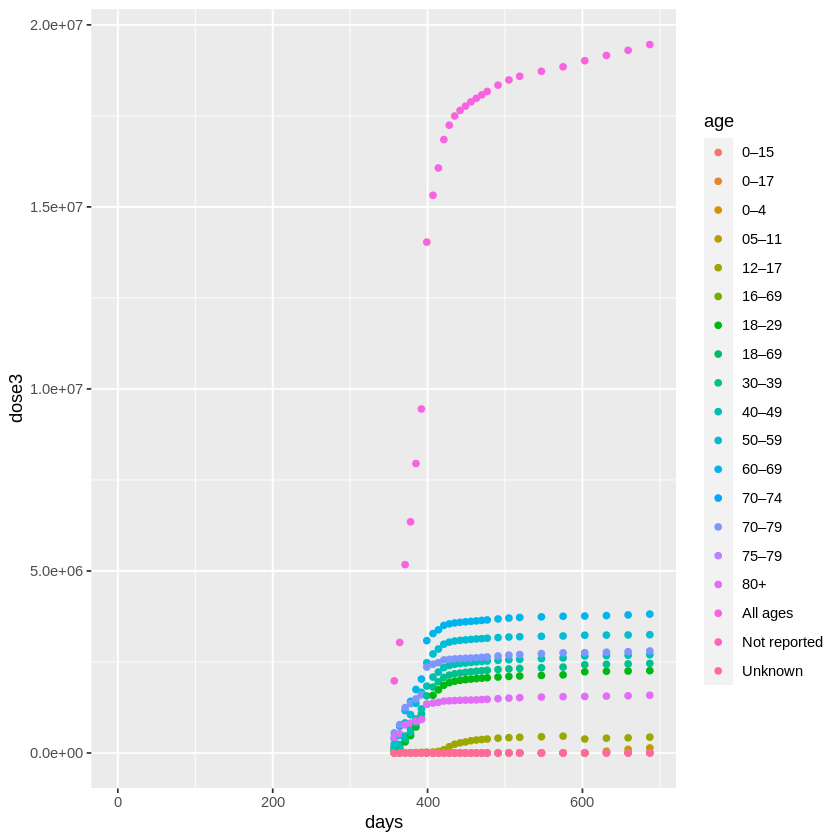

In [11]:
ggplot(newnewdata, aes(x=days,y=dose3))+
geom_point(aes(color=age))

sa1<- nls(dose3~c*days^z, data=newnewdata, start=c(c=1750000, z=0.27))
sa1

ggplot(newnewdata, aes(x=days,y=dose3))+
geom_point(aes(color=age))

#sa2<-lm(log(dose3)~log(days), data=newnewdata)
#sa2

## dose 1

integer(0)

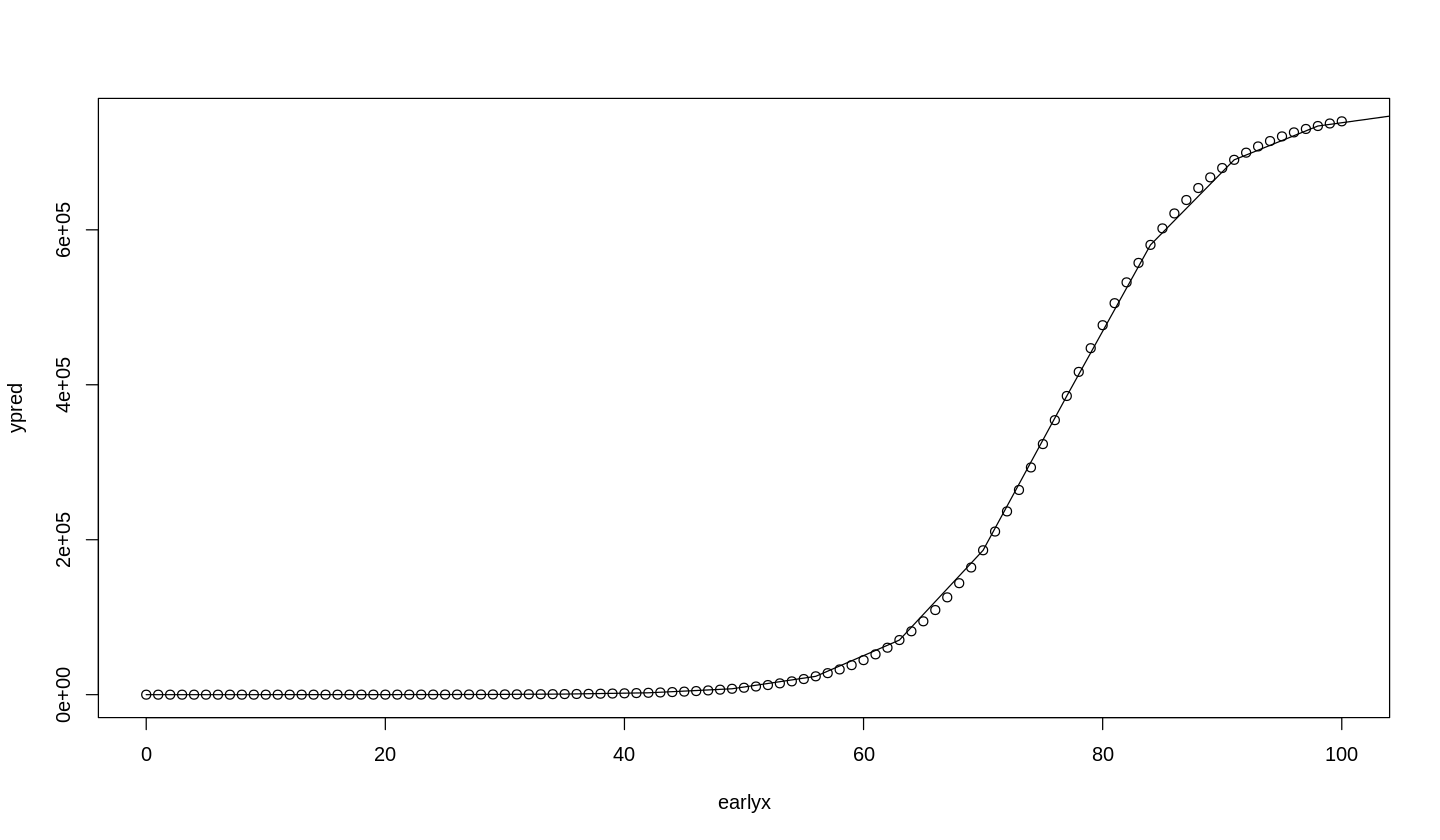

In [13]:
options(repr.plot.width = 12, repr.plot.height = 7)

x<-newnewdata$days
y<-newnewdata$dose1

bbb <- nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 80, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((aaa[1] - earlyx)/aaa[2]))

plot<- plot(ypred~earlyx)+
lines(x,predict(bbb))
plot

## dose 2

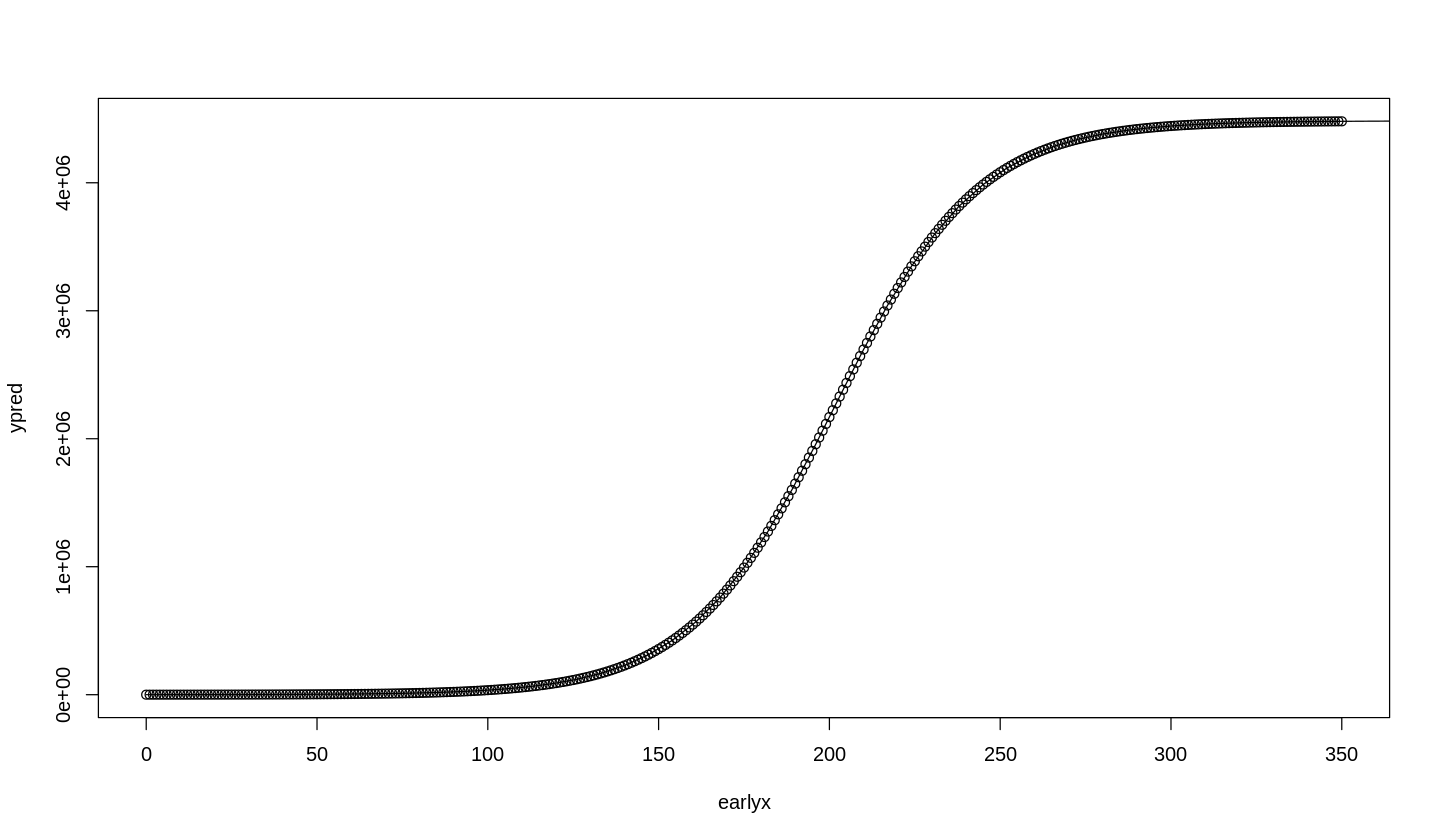

In [11]:
x<-newnewdata$days
y<-newnewdata$dose2

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:350)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))
#predict(bbb)

## dose 3

In [12]:
newnewdata3<-newnewdata|>filter(!is.na(dose3))

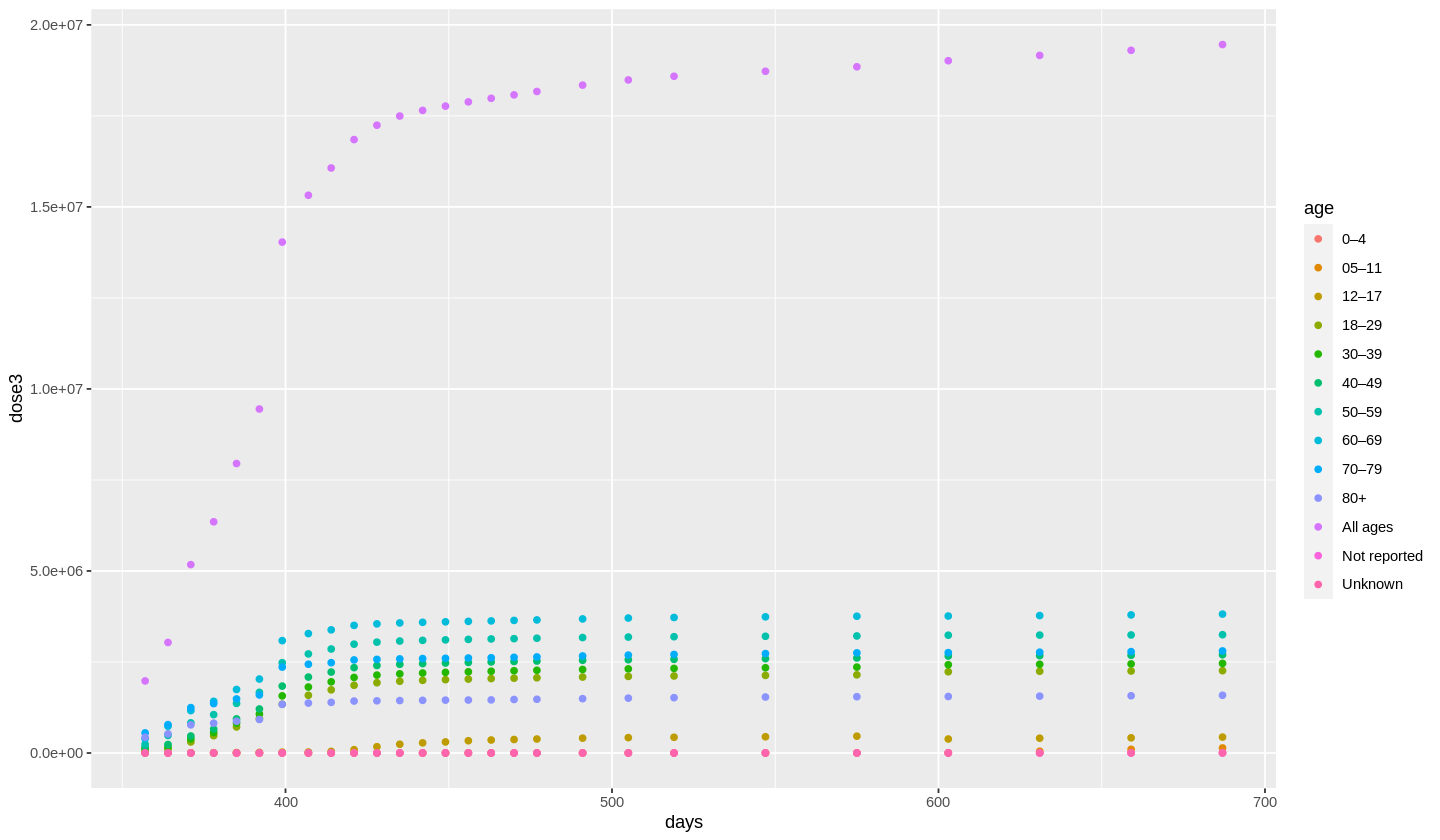

In [13]:
ggplot(newnewdata3, aes(days,dose3))+
geom_point(aes(color=age))

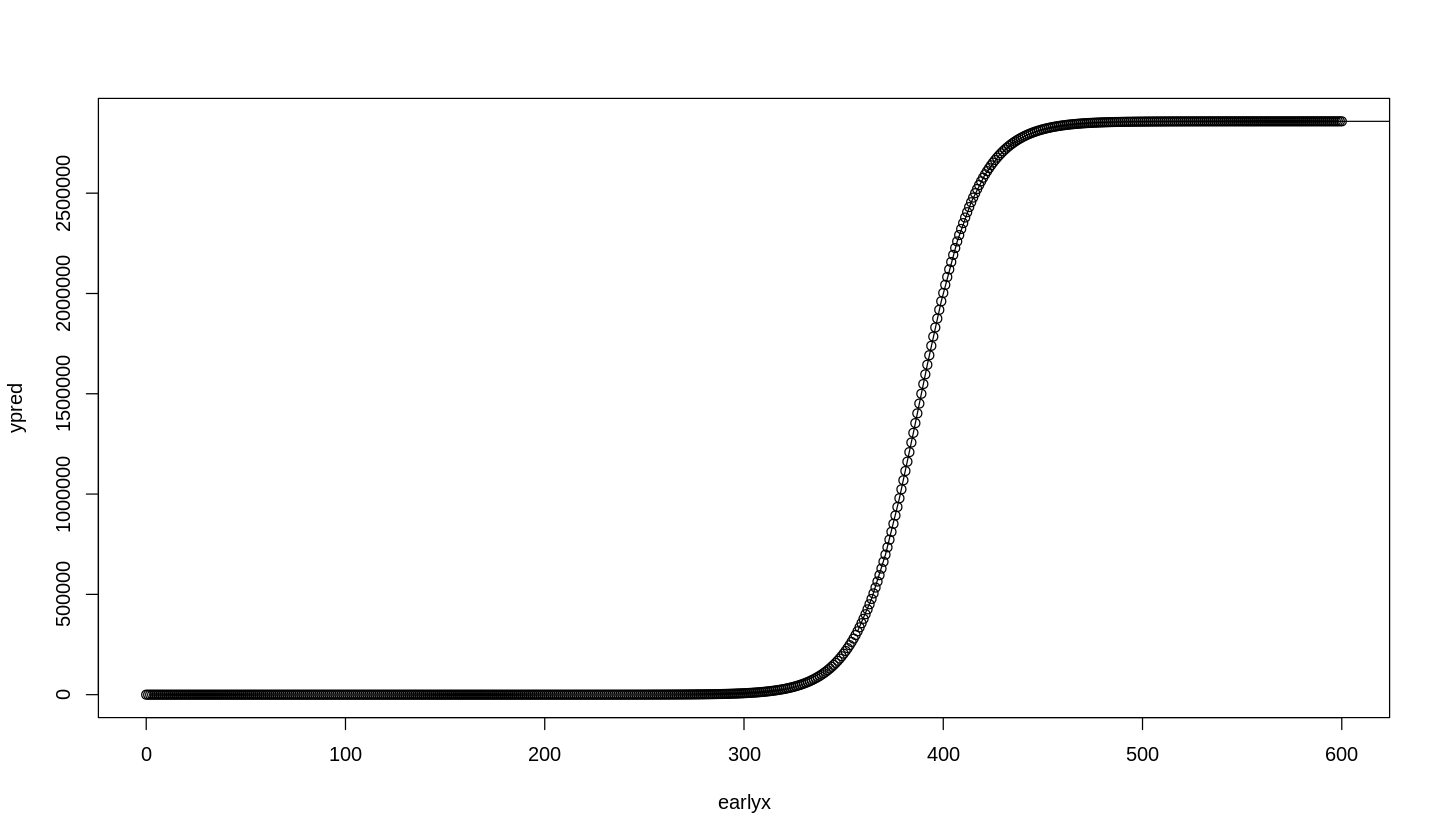

In [14]:
x<-newnewdata3$days
y<-newnewdata3$dose3

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 400, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:600)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

## dose 4

In [15]:
newnewdata4<-newnewdata|>filter(!is.na(dose4))
newnewdata4

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0–4,217,392,217,0,0,0,NA
05–11,1469326,392,1325204,144122,18,0,NA
12–17,2158609,392,114327,2044282,16509,0,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32355994,687,2676211,24302196,19459403,7274231,7741196
Not reported,410,687,357,53,0,0,53
Unknown,18043,687,2569,15474,10960,4831,8673


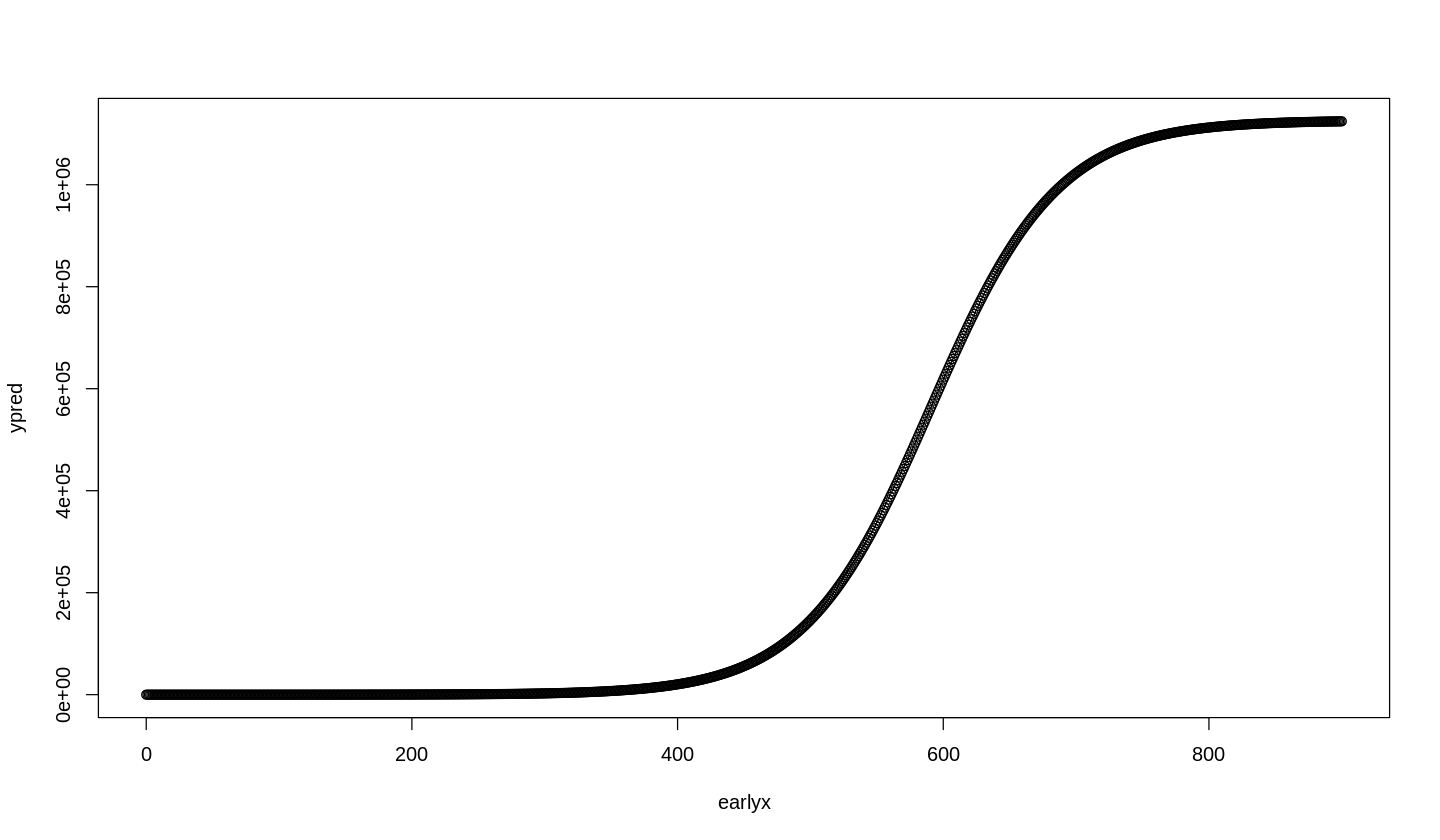

In [27]:
x<-newnewdata4$days
y<-newnewdata4$dose4 


options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 600, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:900)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

## dose 5

# A tibble: 49 × 8
   age   numtotal_atleast1dose  days  dose1   dose2   dose3   dose4   dose5
   <chr>                 <dbl> <dbl>  <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 0–4                   55874   603  54707    1167      21       0     767
 2 05–11               1575001   603 367466 1207535     645       1  301546
 3 12–17               2145555   603 105456 2040099  383737    1358  313094
 4 18–29               5213418   603 653963 4071363 2231075   76590  363216
 5 30–39               4747002   603 522914 3680061 2424386  119019  383086
 6 40–49               4422832   603 391321 3356305 2662894  137609  399301
 7 50–59               4597322   603 286548 3532079 3234989  304008  619907
 8 60–69               4602486   603 174536 3453926 3762088  893058 1484709
 9 70–79               3101692   603  77007 2307415 2756510 1192051 1725377
10 80+                 1733318   603  42278 1297393 1551863  733236 1003069
# … with 39 more rows


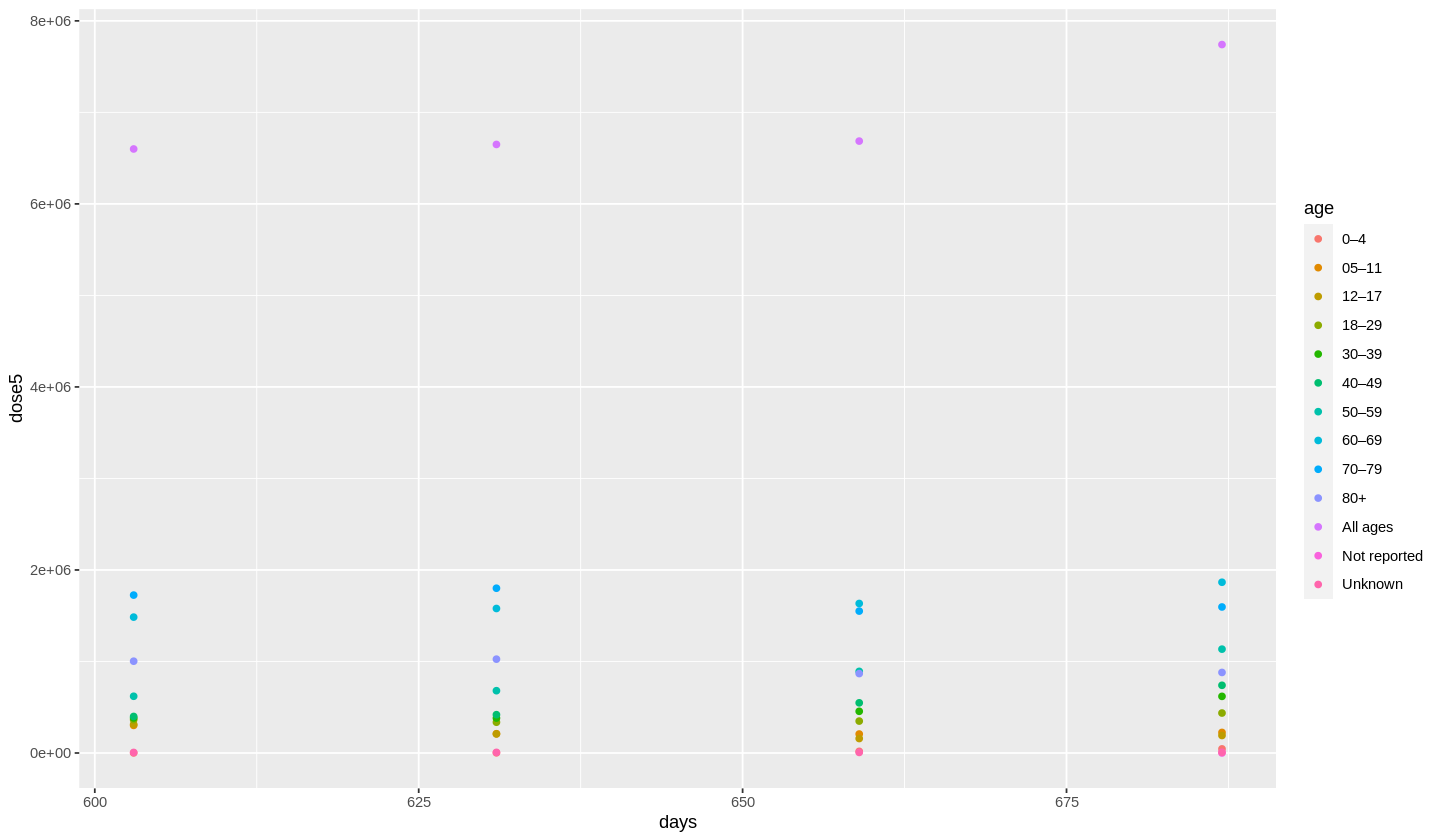

In [17]:
newnewdata5<-newnewdata|>filter(!is.na(dose5))
print(newnewdata5)
ggplot(newnewdata5, aes(x=days,y=dose5))+
geom_point(aes(color=age))

ERROR: Error in nls(y ~ height/(1 + exp((xmid - x)/scal)), start = list(xmid = 640, : singular gradient


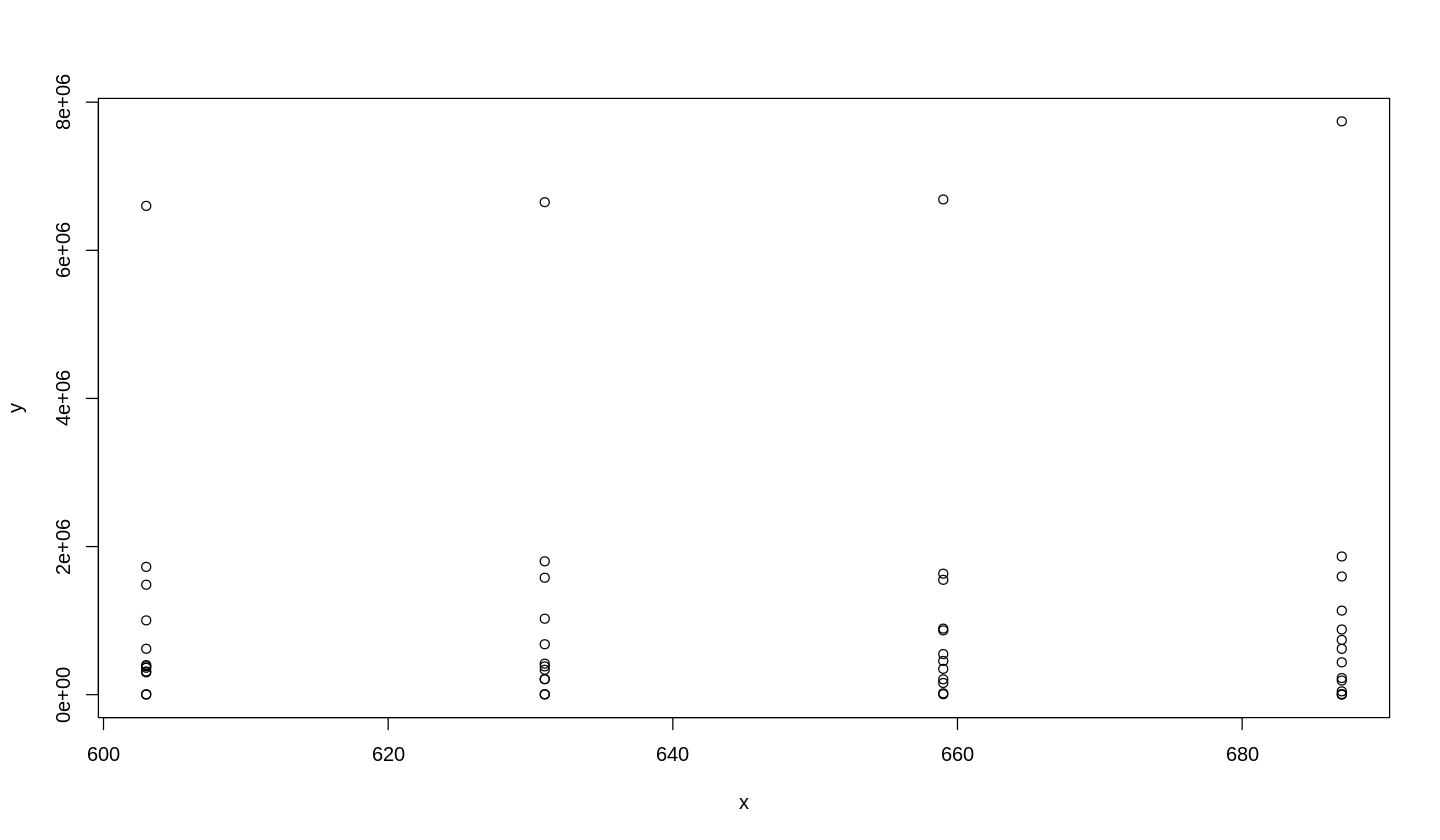

In [18]:
x<-newnewdata5$days
y<-newnewdata5$dose5
plot(y~x)
options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 640, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:700)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

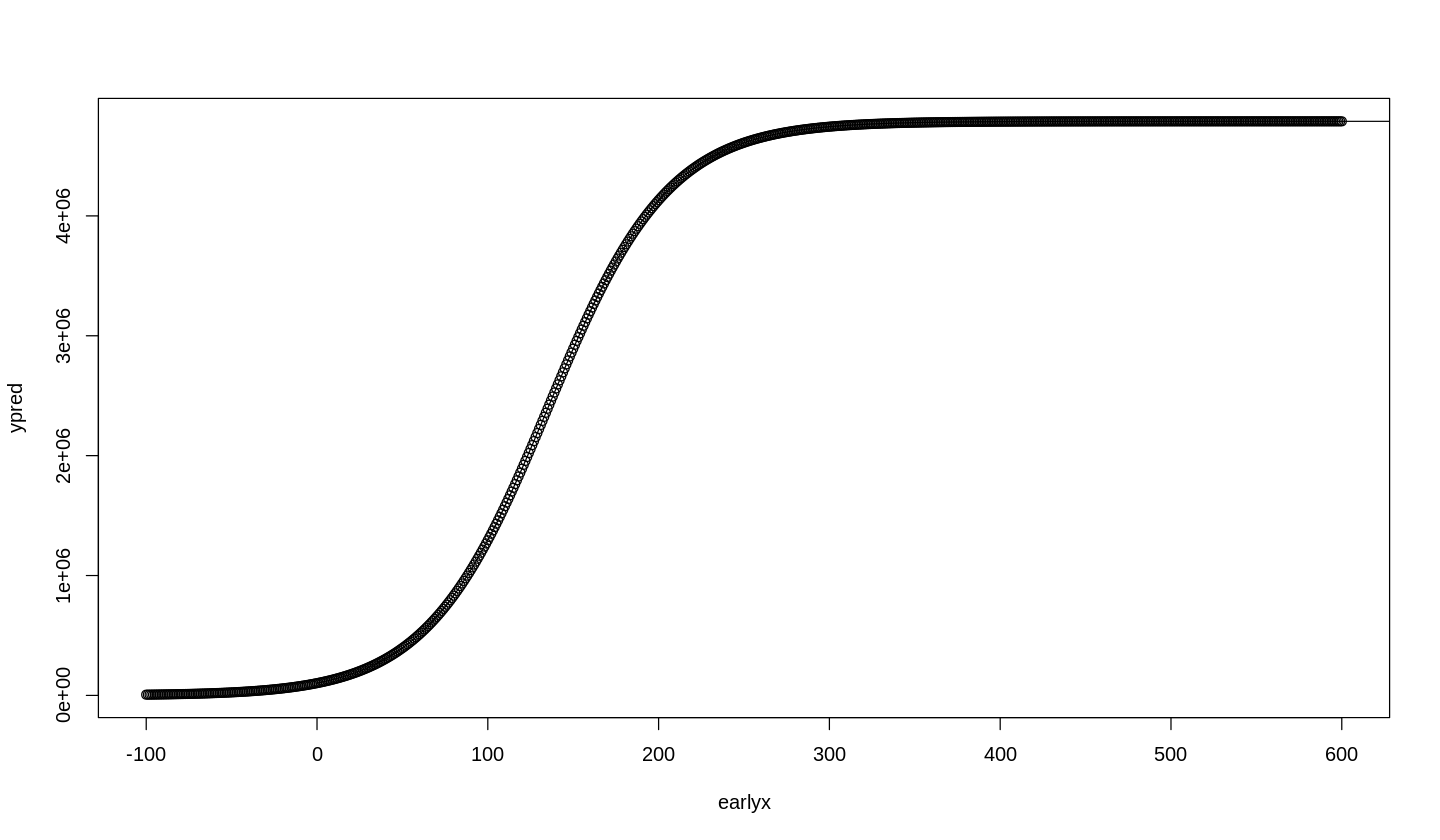

In [19]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(-100:600)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [ ]:
based on age 
be careful of tne data 

In [20]:
bbb <- newnewdata|> nls(numtotal_atleast1dose ~ days/(1 + exp((xmid - days)/scal)), 
                            start = list(xmid = 0, scal = 1, height = 100000))
bbb


ERROR: Error in nls(newnewdata, numtotal_atleast1dose ~ days/(1 + exp((xmid - : 'data' must be a list or an environment


In [21]:
nls(numtotal_atleast1dose ~ days, data=newnewdata)

ERROR: Error in object[[3L]][[1L]]: object of type 'symbol' is not subsettable


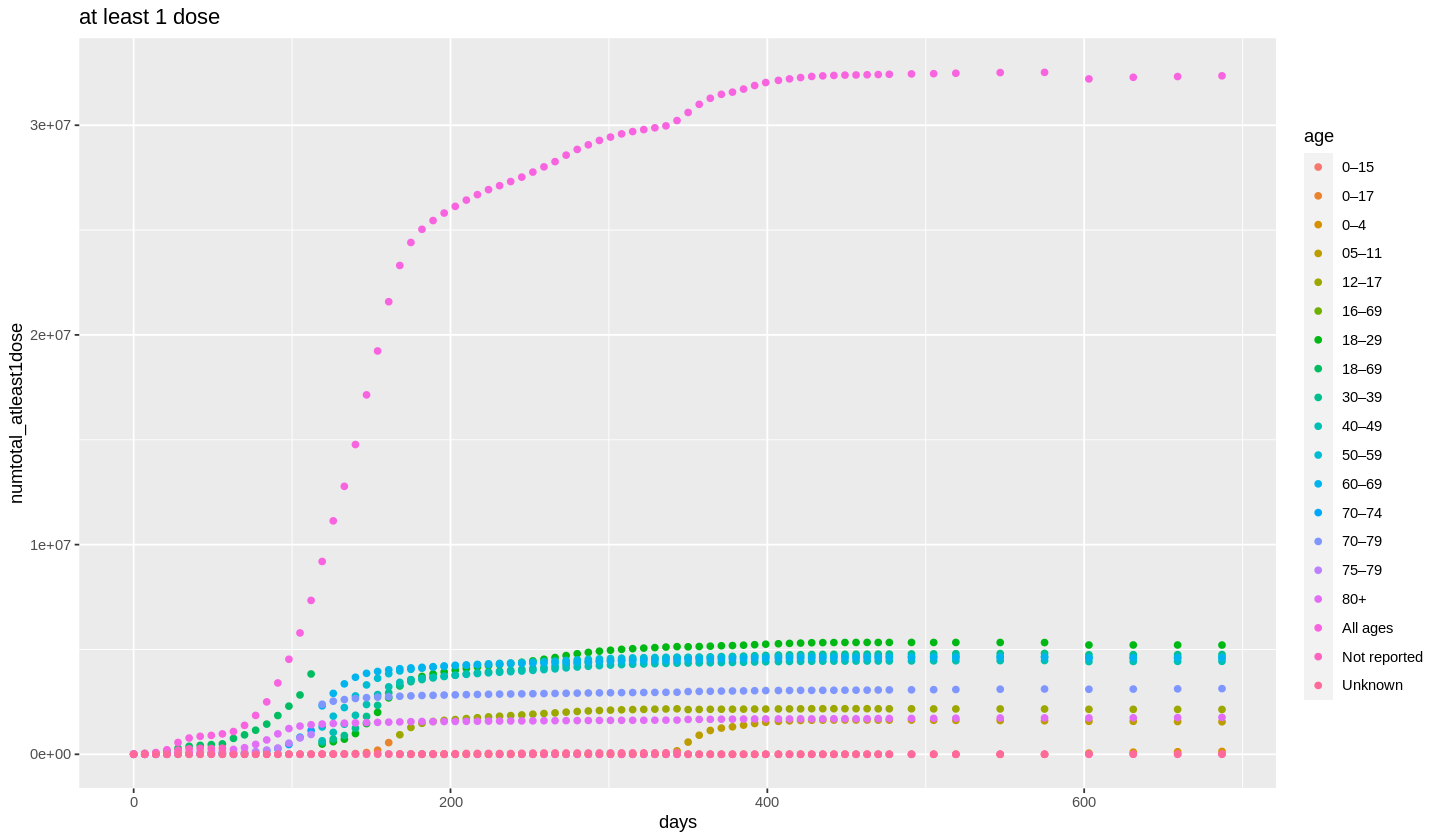

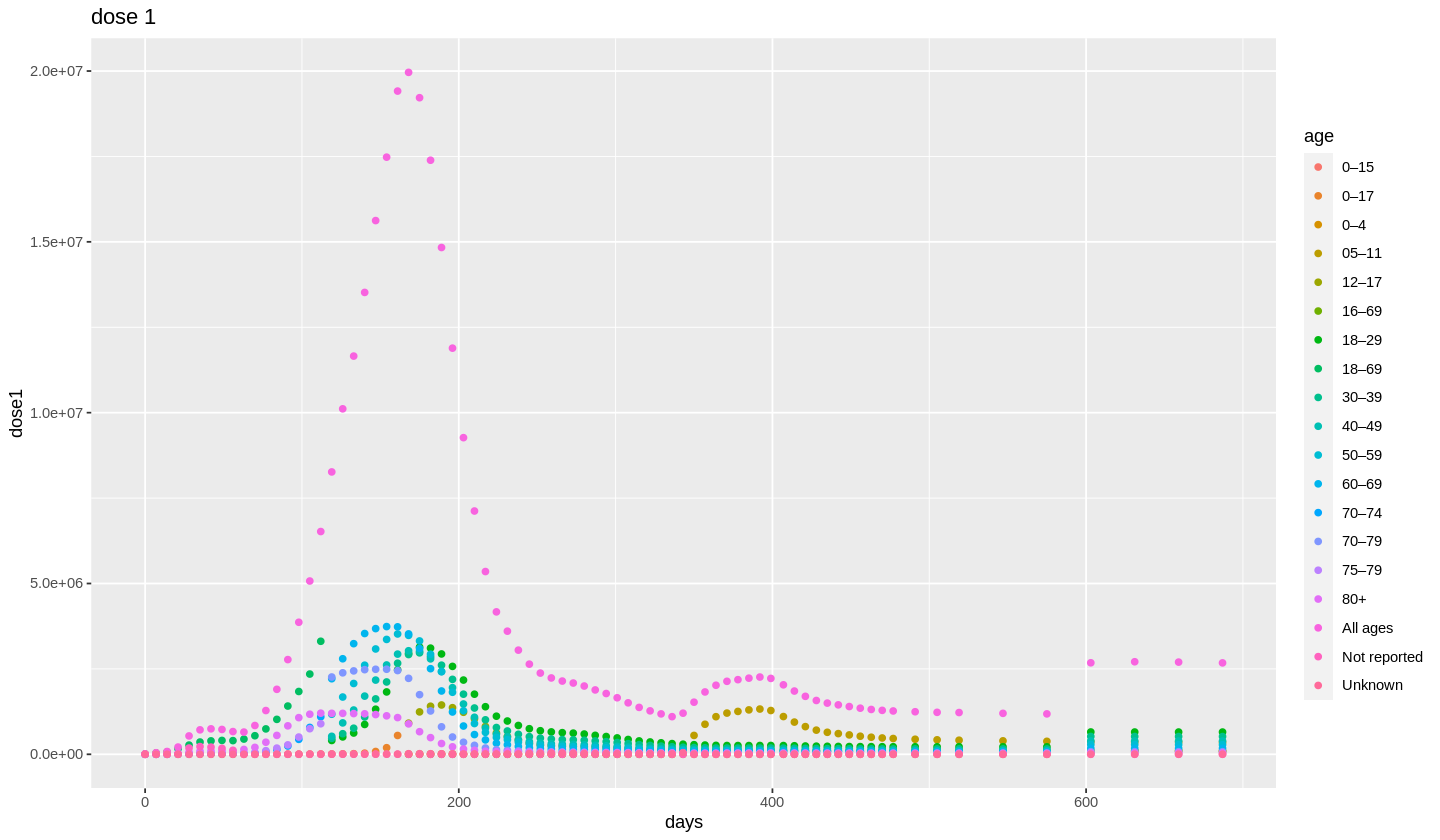

Warning message:
“Removed 564 rows containing missing values (geom_point).”


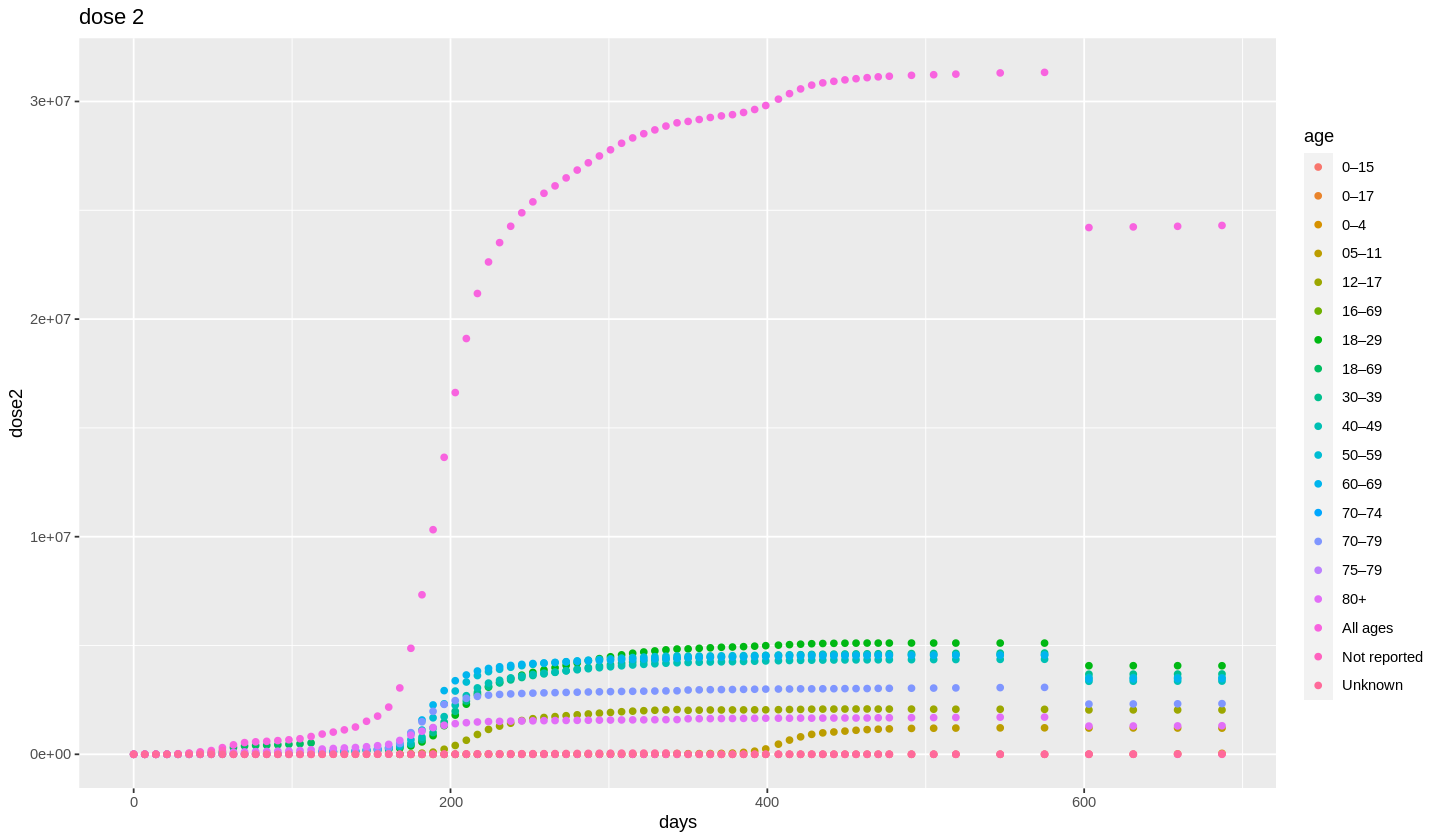

Warning message:
“Removed 629 rows containing missing values (geom_point).”


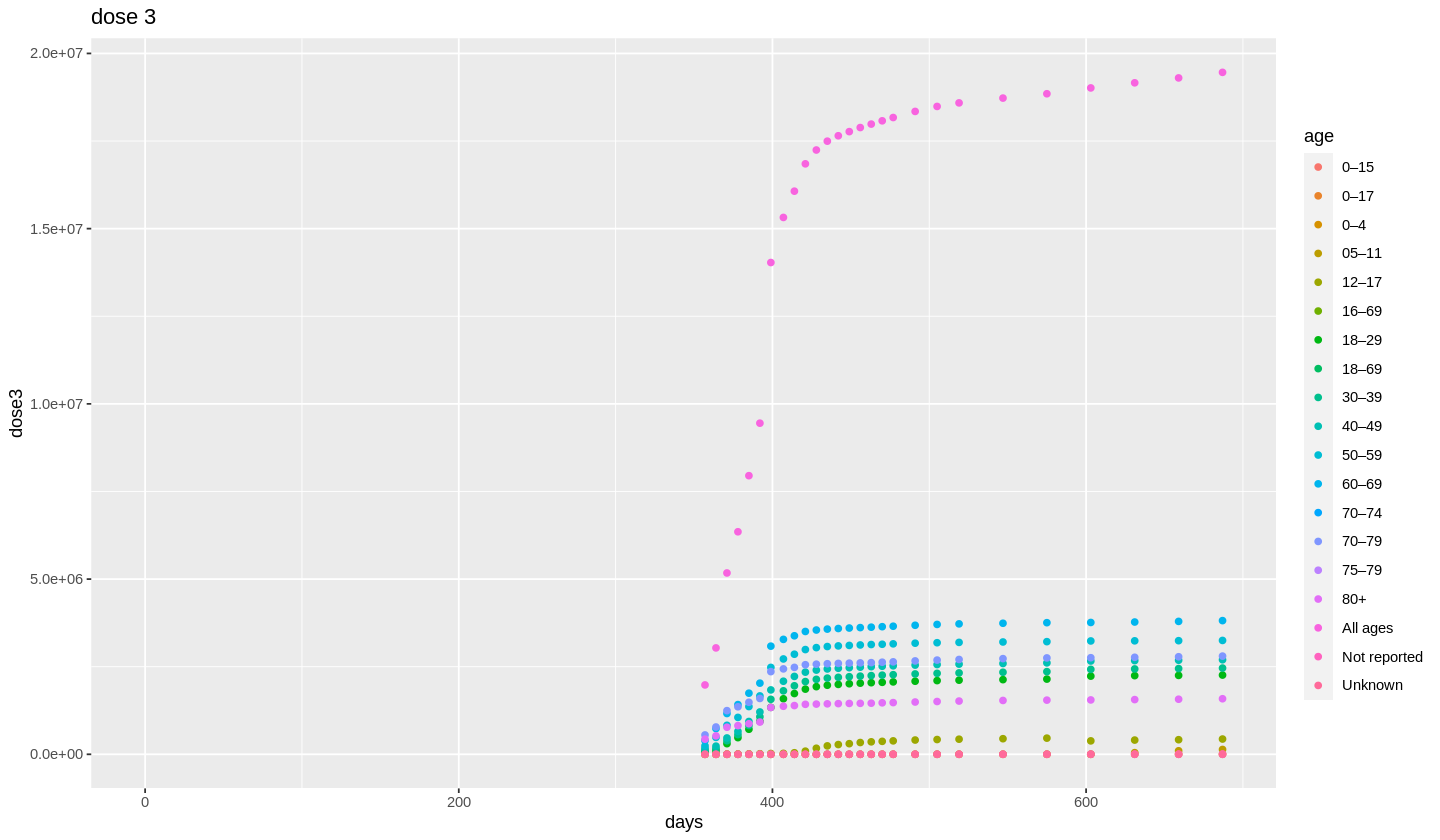

Warning message:
“Removed 866 rows containing missing values (geom_point).”


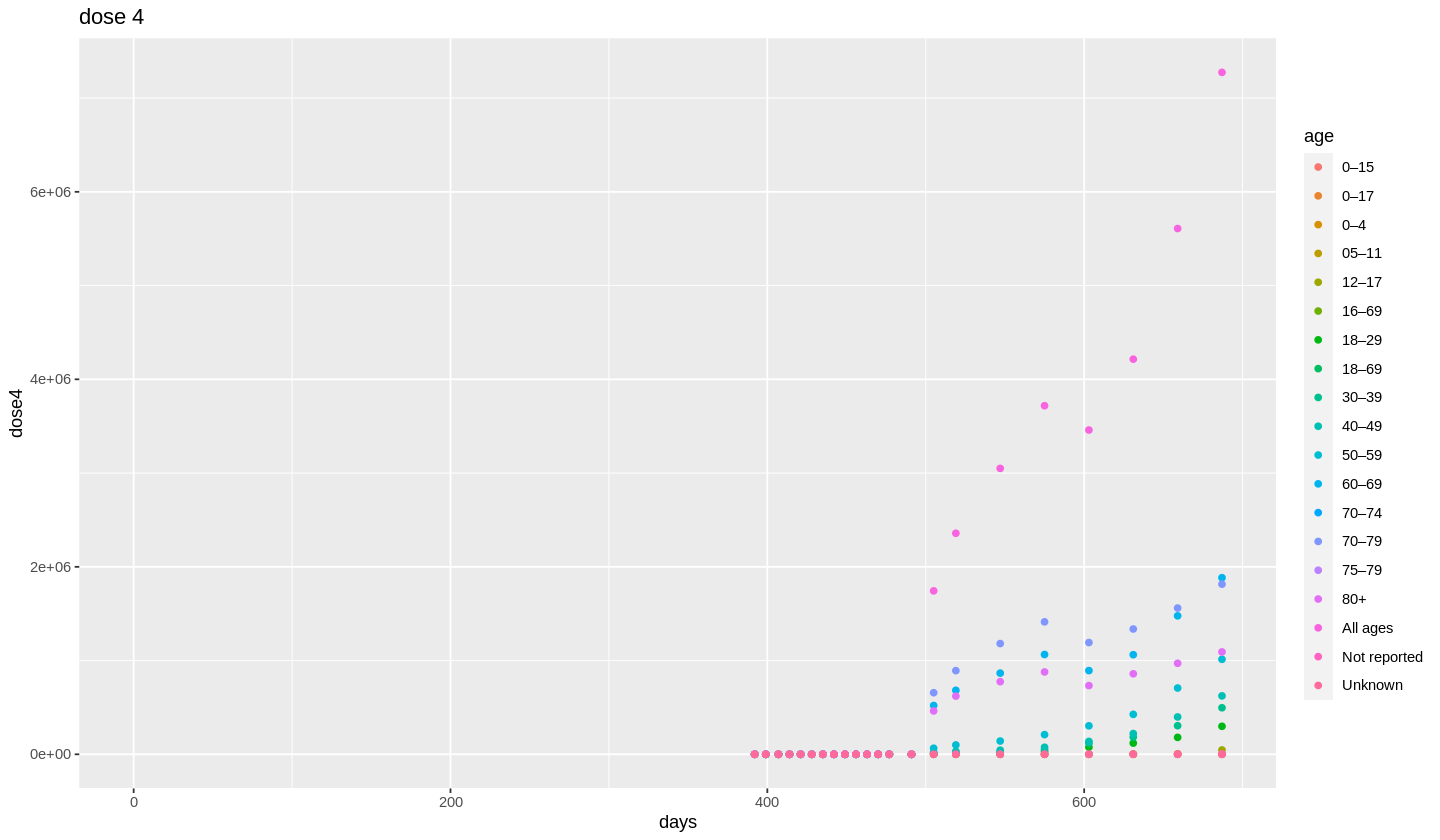

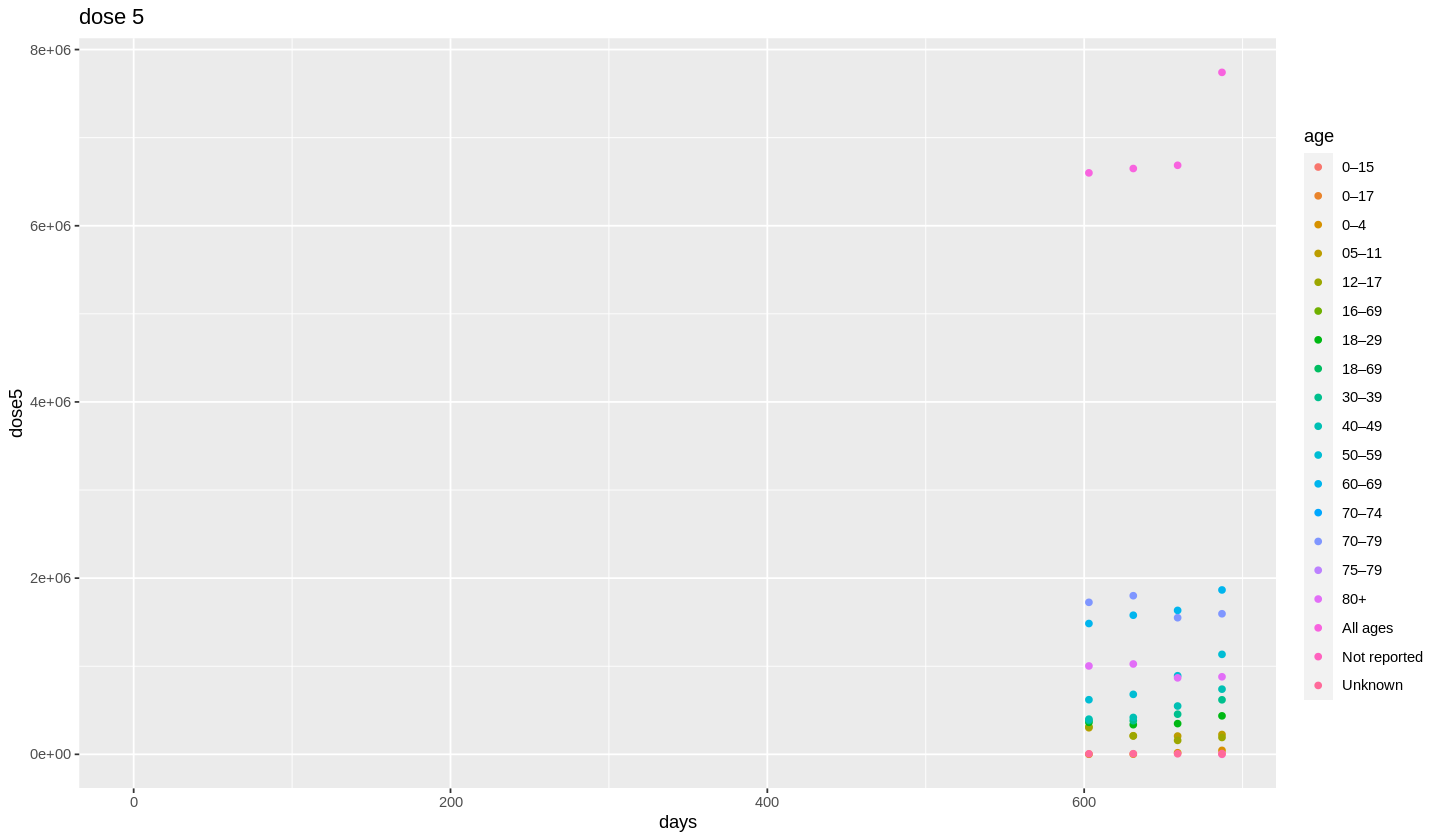

In [22]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(newnewdata, aes(x=days,y=numtotal_atleast1dose,color=age))+
geom_point()+
ggtitle("at least 1 dose")
ggplot(newnewdata, aes(x=days,y=dose1,color=age))+
geom_point()+
ggtitle("dose 1")
ggplot(newnewdata, aes(x=days,y=dose2,color=age))+
geom_point()+
ggtitle("dose 2")
ggplot(newnewdata, aes(x=days,y=dose3,color=age))+
geom_point()+
ggtitle("dose 3")
ggplot(newnewdata, aes(x=days,y=dose4,color=age))+
geom_point()+
ggtitle("dose 4")
ggplot(newnewdata, aes(x=days,y=dose5,color=age))+
geom_point()+
ggtitle("dose 5")

#glm
#nls 

In [ ]:
nls(formula, data, start, control, algorithm,
    trace, subset, weights, na.action, model,
    lower, upper, ...)
newnewdata

In [ ]:
#?nls
#pivot longer to make it tibble 
#newnewdata
#?glm

In [ ]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
bbb

In [ ]:
coef(bbb)
earlyx<-c(0:100)
ypred<-coef(bbb)[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

firstage3<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="0–15")

graph3 <- ggplot(firstage3, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph3

In [ ]:
firstage4<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="16–69")

graph4 <- ggplot(firstage4, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph4

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 37)

#selected.1<- selected|>
# filter(age %in% c("0-4", "05-11", "12-17", "18-29", '30-39', '40-49', '50.59','60-69','70-79','80+'))

#selected.1<- selected|>
# filter(age %in% c("0-15", '0-17', '16-69', '18-69','70-74','75-79','80+'))

#selected.1

graph1.1 <- ggplot(newnewdata, aes(x=days, y=numtotal_atleast1dose, color=age))+
    geom_point(alpha=0.6)+
    geom_line()+
    facet_grid(rows = vars(age))+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    labs(color="Age Cathegory")+
    theme(text = element_text(size = 12))        

graph1.1